In [101]:
"""
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install vnstock
!pip install datetime
!pip install statsmodel
!pip install pmdarima
!pip install sklearn
!pip install keras
"""

'\n!pip install numpy\n!pip install pandas\n!pip install matplotlib\n!pip install vnstock\n!pip install datetime\n!pip install statsmodel\n!pip install pmdarima\n!pip install sklearn\n!pip install keras\n'

## EXTRACT DATA

- Data thu thập từ package vnstock

In [252]:
from vnstock import *
from datetime import datetime

**Vui lòng chuyển đổi sang Vnstock3** thế hệ mới (0.3.0.7) với câu lệnh: `pip install vnstock3 --upgrade`.
**Từ 1/1/2025, vnstock3 sẽ được cài đặt khi sử dụng cú pháp** `pip install vnstock` **thay cho Vnstock Legacy** hiện tại.
Xem chi tiết [chuyển đổi sang vnstock3](https://vnstocks.com/docs/tai-lieu/migration-chuyen-doi-sang-vnstock3).
Phiên bản **Vnstock Legacy (0.2.9.2.2)** bạn đang sử dụng **sẽ không được nâng cấp thêm.**


- Thu thập data từ mã chứng khoán VIC trong khoảng thời gian từ 02/01/2013 - 02/01/2024

In [255]:
data = stock_historical_data(symbol='VIC', start_date='2013-01-02', end_date ='2023-06-30' )

- Lưu data thu được vào tệp csv

In [258]:
data.to_csv("VIC_DATA.csv",index =False)

## EXPLORATORY DATA ANALYST

In [261]:
import pandas as pd

In [263]:
df = pd.read_csv("VIC_DATA.csv")

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    2617 non-null   object
 1   open    2617 non-null   int64 
 2   high    2617 non-null   int64 
 3   low     2617 non-null   int64 
 4   close   2617 non-null   int64 
 5   volume  2617 non-null   int64 
 6   ticker  2617 non-null   object
dtypes: int64(5), object(2)
memory usage: 143.2+ KB


In [267]:
df.head(10)

,time,open,high,low,close,volume,ticker
0,2013-01-02,16876,17407,16770,16982,106720,VIC
1,2013-01-03,16982,16982,16770,16982,118830,VIC
2,2013-01-04,16876,17088,16770,16982,162880,VIC
3,2013-01-07,17088,17831,17088,17725,370650,VIC
4,2013-01-08,17937,18044,17725,17937,363210,VIC
5,2013-01-09,17937,17937,17619,17619,81350,VIC
6,2013-01-10,17619,17619,17195,17619,120980,VIC
7,2013-01-11,17937,17937,17513,17725,171140,VIC
8,2013-01-14,17831,17831,17619,17725,215400,VIC
9,2013-01-15,18044,18150,17725,17725,160930,VIC


In [269]:
df.tail(10)

,time,open,high,low,close,volume,ticker
2607,2023-06-19,53800,53800,52100,52100,2316600,VIC
2608,2023-06-20,52000,52500,51900,52000,1464500,VIC
2609,2023-06-21,52100,52400,51700,52400,2070400,VIC
2610,2023-06-22,52700,52800,52000,52400,1626300,VIC
2611,2023-06-23,52100,52300,51900,52000,2178900,VIC
2612,2023-06-26,52100,52700,51900,52200,1524700,VIC
2613,2023-06-27,52200,53000,52200,52400,2488300,VIC
2614,2023-06-28,52600,52700,52000,52200,1893500,VIC
2615,2023-06-29,52200,52400,51800,51800,1628300,VIC
2616,2023-06-30,51800,51900,51000,51000,1743900,VIC


In [271]:
df.isnull().sum()

time      0
open      0
high      0
low       0
close     0
volume    0
ticker    0
dtype: int64

In [273]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d')

In [275]:
df.describe()

,time,open,high,low,close,volume
count,2617,2617.000000,2617.000000,2617.000000,2617.000000,2.617000e+03
mean,2018-04-06 01:29:41.429117184,57048.342377,57710.664501,56333.754299,57088.285441,1.189721e+06
min,2013-01-02 00:00:00,16876.000000,16982.000000,16708.000000,16982.000000,2.002000e+04
25%,2015-08-26 00:00:00,23050.000000,23266.000000,22942.000000,23050.000000,4.088300e+05
50%,2018-04-09 00:00:00,53500.000000,54000.000000,52600.000000,53500.000000,8.112000e+05
75%,2020-11-16 00:00:00,90745.000000,91842.000000,89638.000000,90834.000000,1.612010e+06
max,2023-06-30 00:00:00,127985.000000,129674.000000,127096.000000,127985.000000,1.513020e+07
std,NaN,33234.989149,33609.800182,32824.208675,33259.111790,1.175974e+06


In [277]:
from ydata_profiling import ProfileReport
ProfileReport(df, minimal=True, progress_bar=False, samples=None, correlations=None, interactions=None,
              explorative=True, dark_mode=True, notebook={'iframe':{'height': '600px'}},
              html={'style':{'primary_color': '#583101'}}, missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()


In [279]:
import matplotlib.pyplot as plt

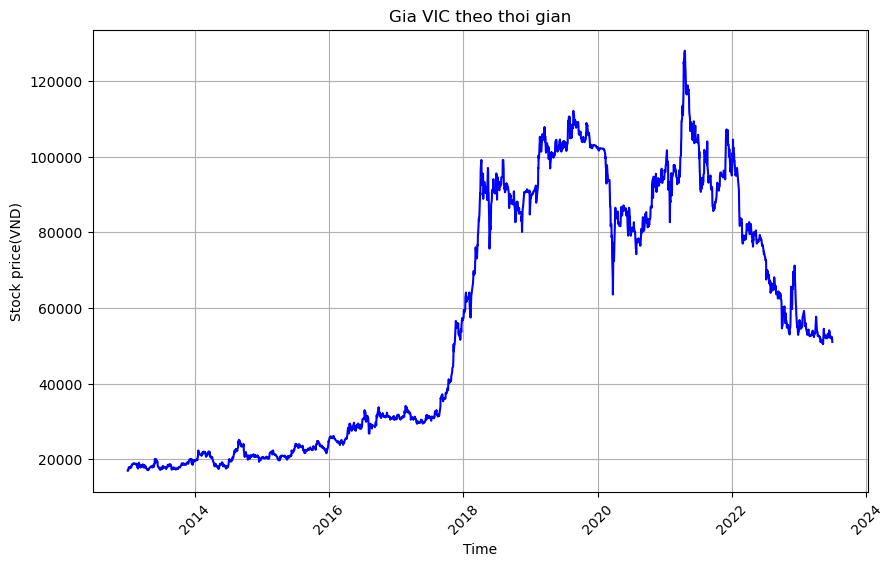

In [281]:
plt.figure(figsize=(10,6))
plt.plot(df['time'],df['close'], color='blue')
plt.title('Gia VIC theo thoi gian')
plt.xlabel('Time')
plt.ylabel('Stock price(VND)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [283]:
df1 = df.drop('ticker', axis=1)
correlation = df1.corr()

In [285]:
import seaborn as sns

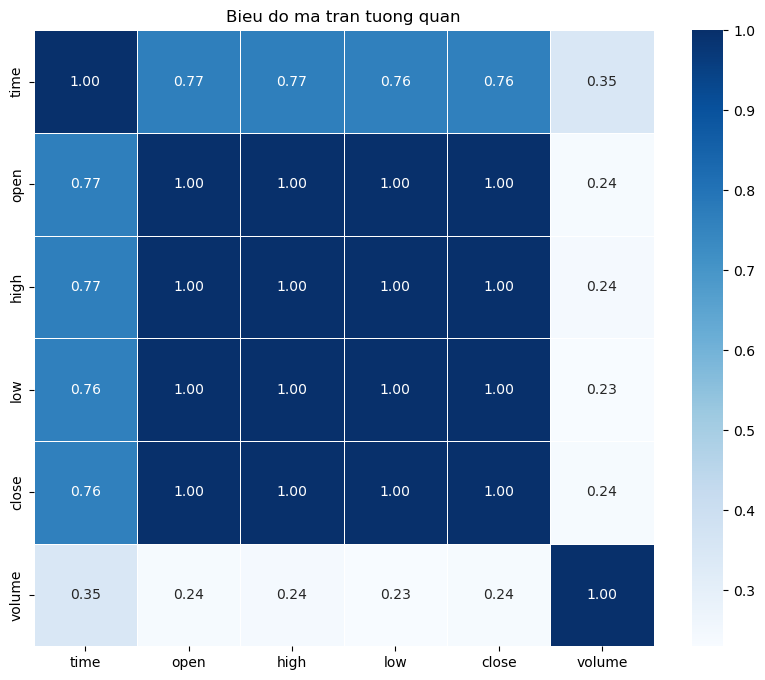

In [287]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,fmt=".2f",cmap ="Blues",linewidths=.5)
plt.title("Bieu do ma tran tuong quan")
plt.show()

In [289]:
df.dtypes

time      datetime64[ns]
open               int64
high               int64
low                int64
close              int64
volume             int64
ticker            object
dtype: object

## KHỞI TẠO CHUỖI LỢI SUẤT VÀ KHẢO SÁT DỮ LIỆU

- Mục tiêu của mô hình là dự báo chuỗi R(t). Ở đây, em đã tiến hành lấy sai phân bậc 1 để chuyển chuỗi giá close sang chuỗi dừng:
  - R(t) = log(X(t)/X(t-1))
- Dữ liệu khảo sát ở đây là sẽ là 3 mốc thời gian trong dữ liệu đã thu với các mốc 2013-2018-2022

In [293]:
df1 = pd.read_csv('VIC_DATA_2013.csv')
df2 = pd.read_csv('VIC_DATA_2018.csv')
df3 = pd.read_csv('VIC_DATA_2022.csv')

In [295]:
import numpy as np
r_t_1 = np.log(df1['close']/df1['close'].shift(1)).values
r_t_2 = np.log(df2['close']/df2['close'].shift(1)).values
r_t_3 = np.log(df3['close']/df3['close'].shift(1)).values

In [297]:
mean = np.nanmean(r_t_1)
r_t_1[0]=mean
r_t_1[:5]

array([0.00059222, 0.        , 0.        , 0.04282211, 0.01188955])

In [299]:
mean = np.nanmean(r_t_2)
r_t_2[0]=mean
r_t_3[:5]

array([        nan, -0.00995033,  0.04401689, -0.02225539,  0.000978  ])

In [301]:
mean = np.nanmean(r_t_3)
r_t_3[0]=mean
r_t_3[:5]

array([-0.00255472, -0.00995033,  0.04401689, -0.02225539,  0.000978  ])

##### BIỂU ĐỒ CHUỖI LỢI SUẤT

Text(0, 0.5, 'Return Rate 2022')

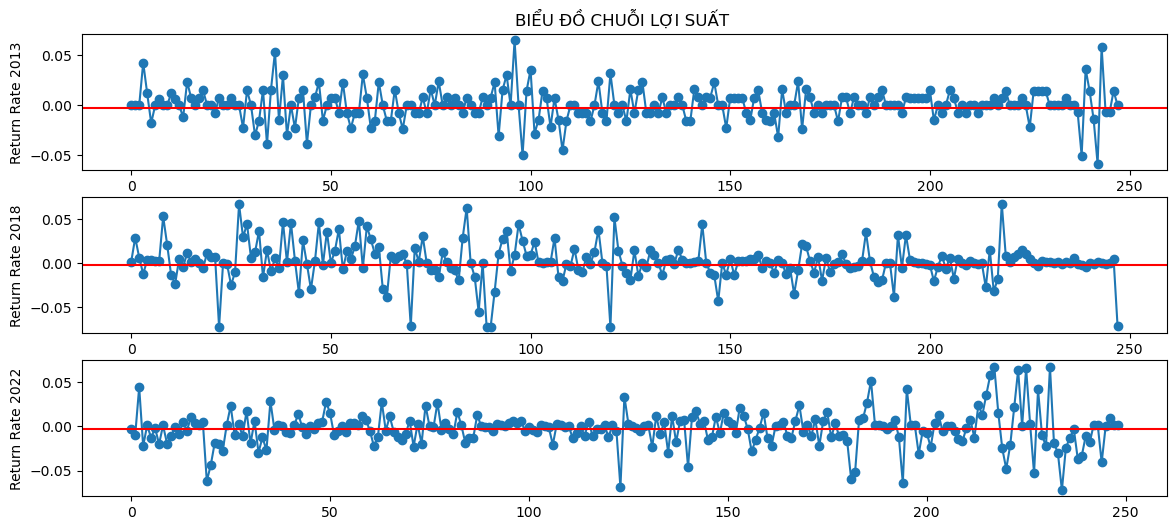

In [304]:
plt.figure(figsize=(14, 6))
plt.subplot(3,1,1)
plt.plot(np.arange(r_t_1.shape[0]), r_t_1, '-o')
plt.axhline(y=mean, label='mean return', c='red')
plt.title('BIỂU ĐỒ CHUỖI LỢI SUẤT ')
plt.ylabel('Return Rate 2013')
plt.subplot(3,1,2)
plt.plot(np.arange(r_t_2.shape[0]), r_t_2, '-o')
plt.axhline(y=mean, label='mean return', c='red')
plt.ylabel('Return Rate 2018')
plt.subplot(3,1,3)
plt.plot(np.arange(r_t_3.shape[0]), r_t_3, '-o')
plt.axhline(y=mean, label='mean return', c='red')
plt.ylabel('Return Rate 2022')

- Thông qua biểu đồ chuỗi lợi suất, R(t) là một biến động ngẫu nhiên, trung bình xấp xỉ 0 và phương sai không đổi

##### QUAN HỆ TUYẾN TÍNH GIỮA R(t) và R(t-1)

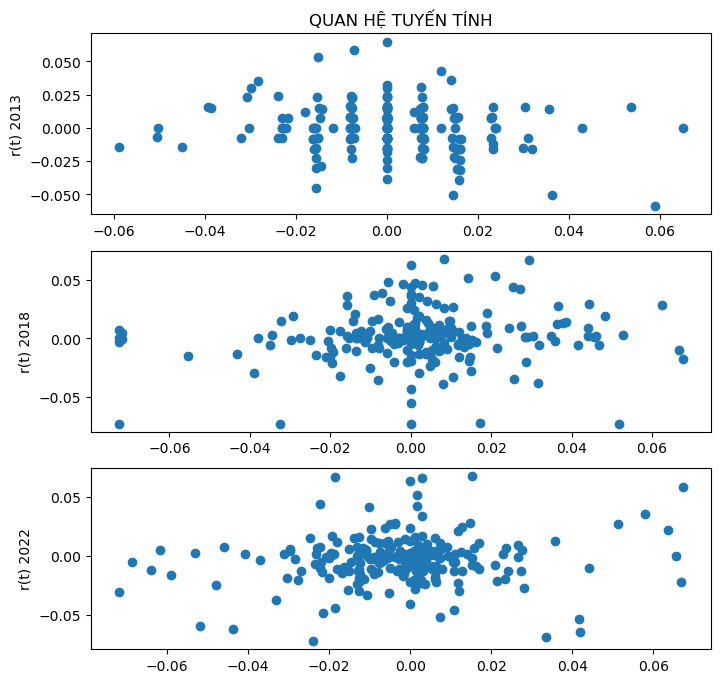

In [308]:
plt.figure(figsize=(8, 8))
plt.subplot(3,1,1)
plt.scatter(x=r_t_1[1:], y=r_t_1[:-1])
plt.title('QUAN HỆ TUYẾN TÍNH')
plt.ylabel('r(t) 2013')
plt.subplot(3,1,2)
plt.scatter(x=r_t_2[1:], y=r_t_2[:-1])
plt.ylabel('r(t) 2018')
plt.subplot(3,1,3)
plt.scatter(x=r_t_3[1:], y=r_t_3[:-1])
plt.ylabel('r(t) 2022')
plt.show()

- Nhìn vào đồ thị, nhận thấy rằng theo thời gian,từ 2013 đến 2022 thì 2 chuỗi R(t) và R(t-1) không có mối quan hệ tương quan, biểu đồ cho thấy chúng là tập hợp các điểm không theo quy tắc cụ thể và càng ngày càng biến động

##### PHÂN PHỐI XÁC SUẤT



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating you

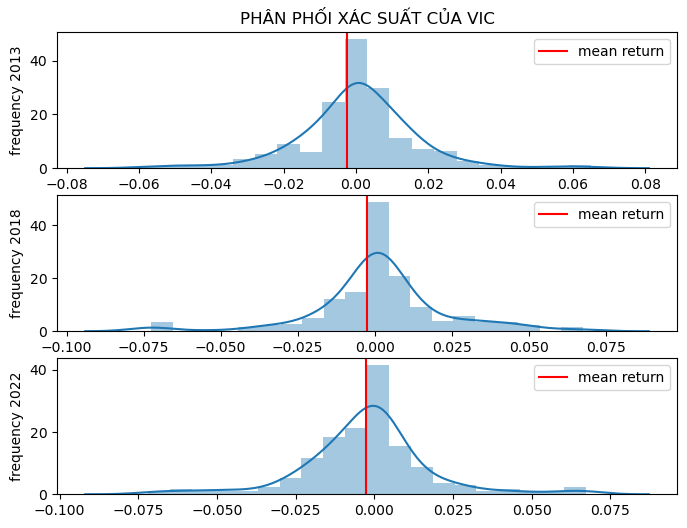

In [312]:
import seaborn as sns
plt.figure(figsize = (8, 6))
plt.subplot(3,1,1)
sns.distplot(r_t_1, bins = 20)
plt.axvline(x=mean, label='mean return', c='red')
plt.title('PHÂN PHỐI XÁC SUẤT CỦA VIC')
plt.legend()
plt.ylabel('frequency 2013')
plt.subplot(3,1,2)
sns.distplot(r_t_2, bins = 20)
plt.axvline(x=mean, label='mean return', c='red')
plt.legend()
plt.ylabel('frequency 2018')
plt.subplot(3,1,3)
sns.distplot(r_t_3, bins = 20)
plt.axvline(x=mean, label='mean return', c='red')
plt.legend()
plt.ylabel('frequency 2022')
plt.show()

- Thông qua biểu đồ, có thể nhận thấy rằng chuỗi phân phấn có dạng phân phối chuẩn, kì vọng của nó xấp xỉ bằng 0

## SETUP DATA VÀ TIẾN HÀNH KIỂM TRA TÍNH DỪNG

In [316]:
data_ex = df.copy()
data_ex = data_ex.reset_index()

In [318]:
data_ex

,index,time,open,high,low,close,volume,ticker
0,0,2013-01-02,16876,17407,16770,16982,106720,VIC
1,1,2013-01-03,16982,16982,16770,16982,118830,VIC
2,2,2013-01-04,16876,17088,16770,16982,162880,VIC
3,3,2013-01-07,17088,17831,17088,17725,370650,VIC
4,4,2013-01-08,17937,18044,17725,17937,363210,VIC
...,...,...,...,...,...,...,...,...
2612,2612,2023-06-26,52100,52700,51900,52200,1524700,VIC
2613,2613,2023-06-27,52200,53000,52200,52400,2488300,VIC
2614,2614,2023-06-28,52600,52700,52000,52200,1893500,VIC
2615,2615,2023-06-29,52200,52400,51800,51800,1628300,VIC


In [320]:
data_ex.set_index('time', inplace=True)

In [322]:
data_ex

,index,open,high,low,close,volume,ticker
time,,,,,,,
2013-01-02,0,16876,17407,16770,16982,106720,VIC
2013-01-03,1,16982,16982,16770,16982,118830,VIC
2013-01-04,2,16876,17088,16770,16982,162880,VIC
2013-01-07,3,17088,17831,17088,17725,370650,VIC
2013-01-08,4,17937,18044,17725,17937,363210,VIC
...,...,...,...,...,...,...,...
2023-06-26,2612,52100,52700,51900,52200,1524700,VIC
2023-06-27,2613,52200,53000,52200,52400,2488300,VIC
2023-06-28,2614,52600,52700,52000,52200,1893500,VIC


In [324]:
data_ex = data_ex['close'].to_frame()

In [326]:
data_ex

,close
time,
2013-01-02,16982
2013-01-03,16982
2013-01-04,16982
2013-01-07,17725
2013-01-08,17937
...,...
2023-06-26,52200
2023-06-27,52400
2023-06-28,52200


#### INSPECTION ADF

In [329]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    result = adfuller(timeseries,autolag='AIC')
    print("Ket qua kiem dinh ADF:")
    print(f'Gia tri thong ke: {result[0]}')
    print(f'p-value: {result[1]}')
    print("Gia tri toi han:")
    for key,value in result[4].items():
        print(f'\t{key}:{value}')

test_stationarity(data_ex['close'])

Ket qua kiem dinh ADF:
Gia tri thong ke: -1.3203152784261774
p-value: 0.6198275634533333
Gia tri toi han:
	1%:-3.432856986061305
	5%:-2.8626475938238967
	10%:-2.5673596115790938


- Theo kết quả quan sát được, giá trị ADF lớn hơn các giá trị tới hạn, p-value cũng lớn hơn nhiều so với mức ý nghĩa thông thường
-> Có khả năng tập dữ liệu không có tính dừng

In [332]:
import numpy as np
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose

In [334]:
def make_stationary(series):
    diff = series.diff().dropna()
    print("\nSau khi lấy sai phân")
    test_stationarity(diff)

In [336]:
make_stationary(data_ex['close'])


Sau khi lấy sai phân
Ket qua kiem dinh ADF:
Gia tri thong ke: -22.265876284944518
p-value: 0.0
Gia tri toi han:
	1%:-3.432856986061305
	5%:-2.8626475938238967
	10%:-2.5673596115790938


- Như vậy, sau khi lấy sai phân bậc 1, ta thu được giá trị p-value = 0. Hợp lý khi thực hiện lấy sai phân bậc 1 trong việc khởi tạo chuỗi lợi suất để khảo sát dữ liệu ở trên. Tiếp theo, tiến hành chạy thử mô hình ARIMA để xác định 2 tham số còn lại là AR và MA

## ARIMA

- ARIMA là một mô hình thống kê được sử dụng để phân tích và dự báo chuỗi thời gian. Nó có thể được sử dụng để dự đoán giá cổ phiếu bằng cách phân tích dữ liệu lịch sử để xác định xu hướng và mô hình, và áp dụng mô hình ARIMA để dự báo giá trong tương lai dựa trên các thông số đã xác định. ARIMA có thể nắm bắt cả xu hướng ngắn hạn và dài hạn, cũng như các mô hình theo mùa, nhưng nên sử dụng kết hợp với các phương pháp khác để đưa ra quyết định đầu tư sáng suốt.

In [341]:
from pmdarima.arima import auto_arima

# Chạy mô hình ARIMA để xác định tham số tối ưu
model = auto_arima(data_ex['close'], seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=44465.527, Time=1.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=44471.900, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=44469.460, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=44469.631, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=44470.213, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=44471.724, Time=1.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=44472.023, Time=1.03 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=44468.317, Time=1.70 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=44468.338, Time=2.49 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=44471.151, Time=0.63 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=44471.658, Time=0.75 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=44471.786, Time=0.68 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=44470.382, Time=1.87 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=1.14 sec

Best model:  ARIMA(2,1,2

- Bảng trên là kết quả từ mô hình ARIMA:
  - Cột COEF là giá trị hệ số ước lượng từ mô hình.
  - Cột STD ERR là độ lệch chuẩn của hệ số ước lượng. Từ giá trị ước lượng và độ lệch chuẩn để tính toán ra khoảng tin cậy. Cận trên và cận dưới của khoảng tin cậy là cột [0.025 - 0.975]
  - Cột z là giá trị tới hạn được suy ra từ phân phối chuẩn hóa
  - Cột P > |z| chính là p-value, là xác suất để giá trị P(|X|>0 | X~N(0, )).

- Sau khi xác định được các tham số lý tưởng, chúng ta có thể áp dụng mô hình ARIMA vào dữ liệu và đưa ra dự báo. Để thực hiện điều này, chúng ta sẽ sử dụng phương pháp tiếp cận rolling fit, bao gồm đào tạo mô hình trên một tập dữ liệu và sử dụng nó để ước tính giá trị tiếp theo trong tập kiểm tra. Sau đó, chúng ta sẽ thêm giá trị dự kiến ​​vào tập huấn luyện và tiếp tục quá trình cho đến khi đưa ra dự đoán cho toàn bộ tập kiểm tra.

In [345]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Định nghĩa mô hình ARIMA
def arima_forecast(history):
    # Sử dụng mô hình phù hợp nhất
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    
    # Đưa ra dự đoán
    output = model_fit.forecast()
    yhat = output[0]
    return yhat

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = data_ex.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

# Kiểm định Walk-forward
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    # Tạo dự đoán
    yhat = arima_forecast(history)
    predictions.append(yhat)
    # Thêm giá trị dự đoán vào tập huấn luyện
    obs = test[t]
    history.append(obs)

- So sánh hiệu suất của mô hình ARIMA với dữ liệu thử nghiệm thực tế

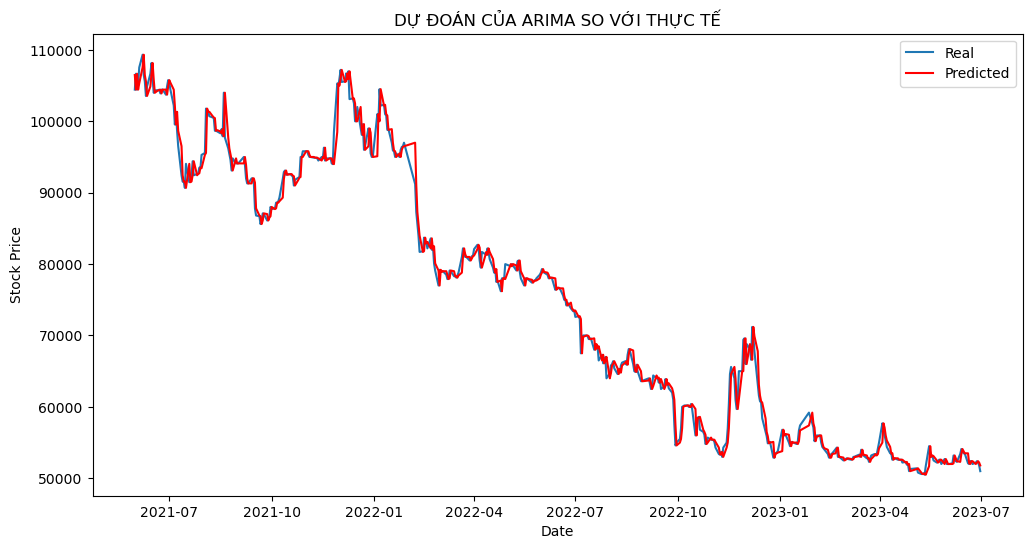

In [348]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(data_ex.iloc[size:,:].index, test, label='Real')
plt.plot(data_ex.iloc[size:,:].index, predictions, color='red', label='Predicted')
plt.title('DỰ ĐOÁN CỦA ARIMA SO VỚI THỰC TẾ')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## FOURIER TRANSFORM

- Biến đổi Fourier là một kỹ thuật toán học có thể được sử dụng trong dự đoán giá cổ phiếu để phân tích và xác định các mô hình cơ bản trong dữ liệu. Biến đổi Fourier dựa trên nguyên tắc rằng bất kỳ hàm tuần hoàn nào cũng có thể được biểu diễn dưới dạng tổng của các sóng sin và cosin đơn giản với tần số và biên độ khác nhau.
- Bằng cách áp dụng Biến đổi Fourier vào dữ liệu thị trường chứng khoán, chúng ta có thể phân tích dữ liệu thành các tần số thành phần và xem xét cách chúng đóng góp vào mô hình tổng thể. Điều này có thể giúp chúng ta xác định xu hướng, chu kỳ và các mô hình khác trong dữ liệu mà có thể không rõ ràng khi chỉ xem giá cổ phiếu thô.
- Một cách tiếp cận phổ biến để sử dụng Biến đổi Fourier để dự đoán giá cổ phiếu là phân tích dữ liệu thành các dải tần số khác nhau và sau đó sử dụng từng dải để đưa ra dự đoán riêng. Ví dụ, các thành phần tần số thấp có thể được sử dụng để dự đoán xu hướng dài hạn, trong khi các thành phần tần số cao có thể được sử dụng để dự đoán biến động ngắn hạn.

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


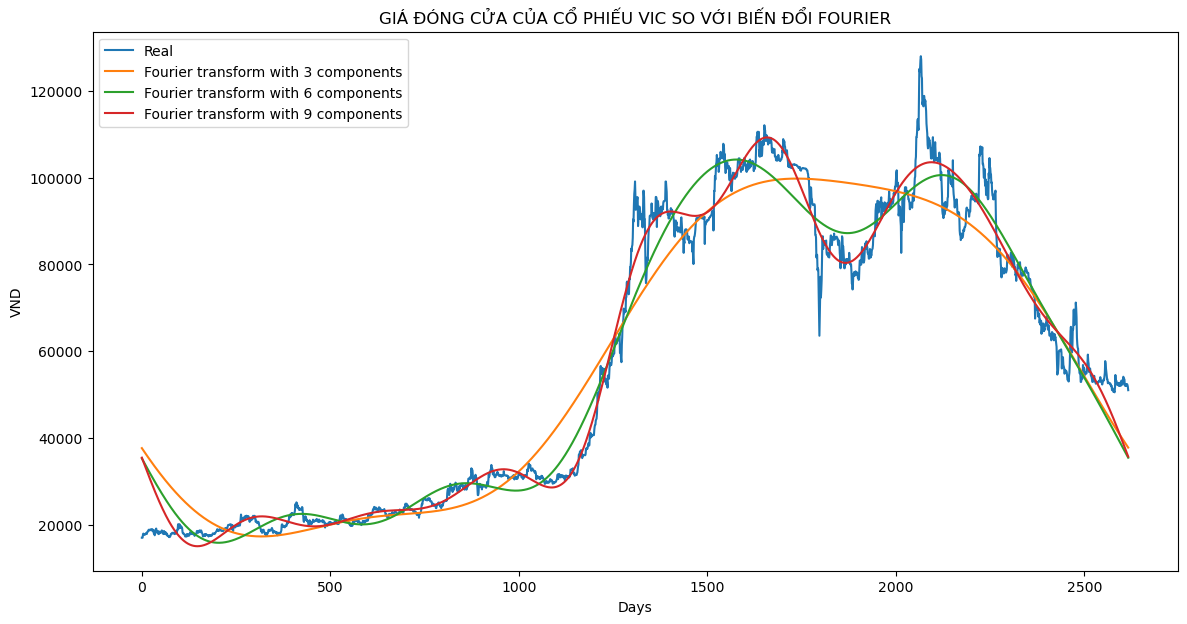

In [352]:
# Biến đổi Fourier
data_FT = data_ex[['close']]
close_fft = np.fft.fft(np.asarray(data_FT['close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

# Đồ thị trực quan biến đổi fourier
plt.figure(figsize=(14, 7), dpi=100)
plt.plot(np.asarray(data_FT['close'].tolist()),  label='Real')
for num_ in [3, 6, 9]:
    fft_list_m10= np.copy(close_fft); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.xlabel('Days')
plt.ylabel('VND')
plt.title('GIÁ ĐÓNG CỬA CỦA CỔ PHIẾU VIC SO VỚI BIẾN ĐỔI FOURIER')
plt.legend()
plt.show()

## TECHNICAL INDICATORS

- Trong mô hình chuỗi thời gian, các chỉ báo kỹ thuật có thể được thêm vào để cung cấp thông tin bổ sung về hành vi giá cổ phiếu. Các chỉ báo kỹ thuật là các phép tính toán học dựa trên dữ liệu thị trường chứng khoán lịch sử có thể được sử dụng để xác định các mô hình và xu hướng trong dữ liệu.

- Cụ thể ở đây, em sử dụng các chỉ báo gồm:
  - EMA với độ dài chu kỳ là 20,50,100: Chỉ số EMA là một dạng trung bình động được tính dựa trên giá đóng cửa của mã.
  - RSI : Chỉ báo kĩ thuật RSI so sánh tỷ lệ tương quan giữa số ngày tăng giá so với số ngày giảm giá.
  - MACD : Đường phân kỳ hội tụ trung bình động là một chỉ báo động lượng thể hiện sức mạnh của xu hướng
  - OBV : Chỉ báo khối lượng giao dịch cân bằng đo lường khối lượng giao dịch và tính lũy kế. 

In [357]:
# EMA
def ema(close, period=20):
    return close.ewm(span=period, adjust=False).mean()

# RSI
def rsi(close, period=14):
    delta = close.diff()
    gain, loss = delta.copy(), delta.copy()
    gain[gain < 0] = 0
    loss[loss > 0] = 0
    avg_gain = gain.rolling(period).mean()
    avg_loss = abs(loss.rolling(period).mean())
    rs = avg_gain / avg_loss
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

# MACD
def macd(close, fast_period=12, slow_period=26, signal_period=9):
    fast_ema = close.ewm(span=fast_period, adjust=False).mean()
    slow_ema = close.ewm(span=slow_period, adjust=False).mean()
    macd_line = fast_ema - slow_ema
    signal_line = macd_line.ewm(span=signal_period, adjust=False).mean()
    histogram = macd_line - signal_line
    return macd_line

# OBV
def obv(close, volume):
    obv = np.where(close > close.shift(), volume, np.where(close < close.shift(), -volume, 0)).cumsum()
    return obv

## XÂY DỰNG TẬP DỮ LIỆU VÀ THỬ NGHIỆM KẾT HỢP

In [360]:
# Thêm các chỉ số kỹ thuật vào tập dữ liệu 
data_ex['ema_20'] = ema(data_ex["close"], 20)
data_ex['ema_50'] = ema(data_ex["close"], 50)
data_ex['ema_100'] = ema(data_ex["close"], 100)

data_ex['rsi'] = rsi(data_ex["close"])
data_ex['macd'] = macd(data_ex["close"])
data_ex['obv'] = obv(data_ex["close"], df["volume"])

# Tạo dataframe ARIMA 
arima_df = pd.DataFrame(history, index=data_ex.index, columns=['ARIMA'])

# Đặt biến đổi Fourier
fft_df.reset_index(inplace=True)
fft_df['index'] = pd.to_datetime(data_ex.index)
fft_df.set_index('index', inplace=True)
fft_df_real = pd.DataFrame(np.real(fft_df['fft']), index=fft_df.index, columns=['Fourier_real'])
fft_df_imag = pd.DataFrame(np.imag(fft_df['fft']), index=fft_df.index, columns=['Fourier_imag'])

# Tạo dataframe chứa các chỉ số kĩ thuật
technical_indicators_df = data_ex[['ema_20', 'ema_50', 'ema_100', 'rsi', 'macd', 'obv', 'close']]

# Kết hợp tập dữ liệu
merged_df = pd.concat([arima_df, fft_df_real, fft_df_imag, technical_indicators_df], axis=1)
merged_df = merged_df.dropna()
merged_df

,ARIMA,Fourier_real,Fourier_imag,ema_20,ema_50,ema_100,rsi,macd,obv,close
2013-01-22,18253,6.530391e+05,-4.690532e+05,17620.543647,17319.354525,17168.841556,77.239606,273.767293,1266300,18253
2013-01-23,18393,6.104283e+05,2.237972e+06,17694.110919,17361.458269,17193.082317,78.528104,300.812523,1571990,18393
2013-01-24,18393,-9.134475e+05,1.443376e+06,17760.671784,17401.910886,17216.843064,78.528104,318.573744,1571990,18393
2013-01-25,18533,-8.381861e+05,1.199511e+06,17834.226852,17446.267322,17242.905577,71.604278,340.026851,1924180,18533
2013-01-28,18814,-4.974681e+05,-1.240004e+05,17927.538580,17499.903898,17274.016358,72.614750,375.375846,2255530,18814
...,...,...,...,...,...,...,...,...,...,...
2023-06-26,52200,1.058282e+06,-2.120133e+06,52568.285239,52720.773317,53762.915271,41.379310,-47.640630,5731720,52200
2023-06-27,52400,-2.546124e+06,5.547796e+06,52552.258074,52708.193971,53735.926849,46.428571,-54.132086,8220020,52400
2023-06-28,52200,-7.629420e+06,-1.177764e+07,52518.709686,52688.264796,53705.512456,48.148148,-74.555511,6326520,52200
2023-06-29,51800,-3.593813e+06,1.197198e+06,52450.261144,52653.430882,53667.779536,45.614035,-121.615966,4698220,51800


## CHIA DỮ LIỆU THÀNH 2 PHẦN TRAIN VÀ TEST VỚI TỶ LỆ 8:2

In [363]:
# Tách dữ liệu làm 2 phần train và test
train_size = int(len(merged_df) * 0.8)
train_df, test_df = merged_df.iloc[:train_size], merged_df.iloc[train_size:]

## THỰC HIỆN CHUẨN HÓA CÁC GIÁ TRỊ

In [366]:
from sklearn.preprocessing import MinMaxScaler

# Chuẩn hóa
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_df.drop('close', axis=1))
test_scaled = scaler.transform(test_df.drop('close', axis=1))

# Chuyển dữ liệu đã được chuẩn hóa thành DataFrame
train_scaled_df = pd.DataFrame(train_scaled, columns=train_df.columns[:-1], index=train_df.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=test_df.columns[:-1], index=test_df.index)

# Kết hợp data
train_scaled_df['close'] = train_df['close']
test_scaled_df['close'] = test_df['close']

# Chia dữ liệu theo chuẩn hóa và labels
X_train = train_scaled_df.iloc[:, :-1].values
y_train = train_scaled_df.iloc[:, -1].values
X_test = test_scaled_df.iloc[:, :-1].values
y_test = test_scaled_df.iloc[:, -1].values

In [368]:
train_scaled

array([[0.01013928, 0.67360305, 0.04765318, ..., 0.77239606, 0.50276785,
        0.2603895 ],
       [0.01140218, 0.65978709, 1.        , ..., 0.78528104, 0.5045493 ,
        0.26207217],
       [0.01140218, 0.16569164, 0.72045645, ..., 0.78528104, 0.50571922,
        0.26207217],
       ...,
       [0.78753518, 0.44647842, 0.21385665, ..., 0.1538284 , 0.33998616,
        0.80422785],
       [0.8075792 , 0.46543009, 0.18868957, ..., 0.26441632, 0.34036877,
        0.8160922 ],
       [0.78753518, 0.46413317, 0.23538998, ..., 0.27499297, 0.33063818,
        0.79885989]])

In [370]:
test_scaled

array([[  0.79555459,   0.44177853,   0.20409515, ...,   0.32827594,
          0.32944186,   0.81255998],
       [  0.81559861,   0.44856889,   0.20640284, ...,   0.42857908,
          0.34194986,   0.83286709],
       [  0.83162842,   0.44895363,   0.18683853, ...,   0.54998594,
          0.36271404,   0.85313346],
       ...,
       [  0.31636537,  -2.0118687 ,  -3.93077171, ...,   0.48148148,
          0.4798241 ,   0.28824336],
       [  0.31275709,  -0.70337942,   0.63384975, ...,   0.45614035,
          0.47672426,   0.27928042],
       [  0.30554052,  -5.38923835, -19.20948988, ...,   0.27777778,
          0.47018328,   0.26968117]])

## XÂY DỰNG MÔ HÌNH DEEPLEARNING

- Mô hình DL mà em đang xây dựng là một mạng FNN - MLP bao gồm 3 lớp:
  - Lớp đầu vào: input
  - Lớp ẩn: 2 lớp ẩn với hàm kích hoạt là 'relu'
  - Lớp đầu ra: Lớp với hàm kích hoạt 'linear' 

In [374]:
# Import Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Định nghĩa mô hình
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# Biên soạn mô hình
model.compile(optimizer='adam', loss='mse')


# Định nghĩa lệnh gọi dừng
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min')

# Huân luyện mô hình với lệnh gọi dừng
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stop], shuffle=False)

Epoch 1/1000


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1395145344.0000 - val_loss: 5915611648.0000
Epoch 2/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1394859520.0000 - val_loss: 5914018304.0000
Epoch 3/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1394129280.0000 - val_loss: 5910277632.0000
Epoch 4/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1392551808.0000 - val_loss: 5903064576.0000
Epoch 5/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1389743616.0000 - val_loss: 5891317760.0000
Epoch 6/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1385402240.0000 - val_loss: 5874144256.0000
Epoch 7/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1379256704.0000 - val_loss: 5850690048.0000
Epoch 8/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1371053952.0000 - val_loss: 5820183040.0000
Epoch 9/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1360572416.0000 - val_loss: 5781944832.0000
Epoch 10/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1347623808.0000 

In [376]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

import numpy as np
y_pred = model.predict(X_test)

# Calculate test metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mpe = np.mean((y_test - y_pred) / y_test) * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")
print(f"Explained Variance Score: {evs}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Percentage Error (MPE): {mpe}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Mean Squared Error (MSE): 2581634.682198347
Mean Absolute Error (MAE): 1262.8881282989444
R2 Score: 0.9921323096784741
Explained Variance Score: 0.9944489128734999
Mean Absolute Percentage Error (MAPE): 29.21012567653835
Mean Percentage Error (MPE): -7.361927647715491


#### ĐÁNH GIÁ KẾT QUẢ

- MSE : Là chỉ số đo lường trung bình bình phương chênh lệch giữa thực tế so với dự đoán
  - Kết quả: 2596185. Chỉ số khá lớn cho thấy sai số là khá lớn.
- MAE : Là giá trị trung bình của các sai số tuyệt đối
  - Kết quả: 1278.
- R2 Score: Đo lường mức độ mô hình giải thích được phương sai trong data
  - Kết quả: 0,9921 là một con số rất cao, cho thấy dữ liệu phù hợp với mô hình
- EVS: Là chỉ số đo lường phần trăm phương sai của dữ liệu được giải thích
  - Kết quả: 0,9946 là rất cao, cho thấy dữ liệu phù hợp với mô hình
- MAPE
- MPE

## TRỰC QUAN KẾT QUẢ DỰ ĐOÁN

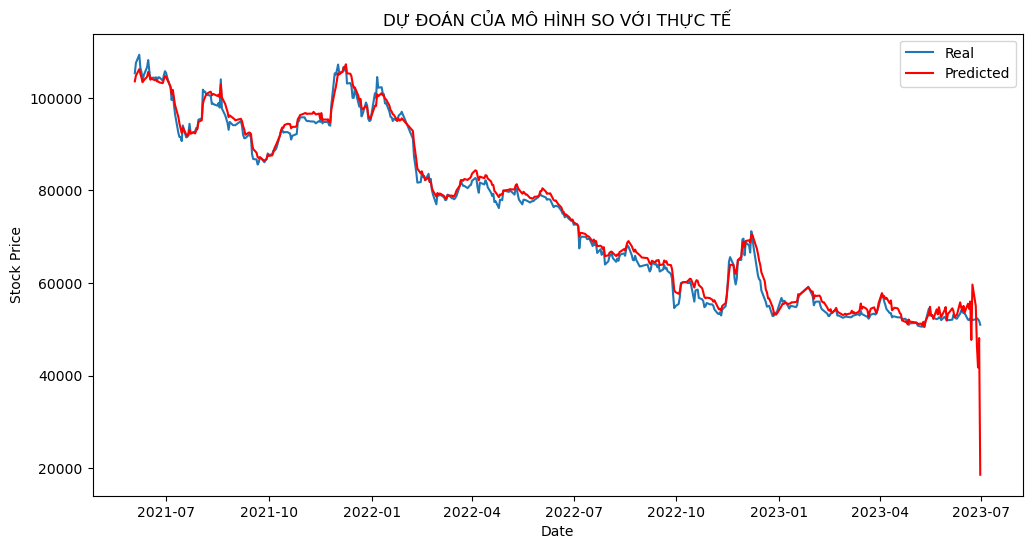

In [250]:
# Plot final Predictions
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test_scaled_df.index, y_test, label='Real')
plt.plot(test_scaled_df.index, y_pred, color='red', label='Predicted')
plt.title('DỰ ĐOÁN CỦA MÔ HÌNH SO VỚI THỰC TẾ')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()